In [3]:
#Forecast the sales for 1 year for the furniture products category on the basis of the historical data

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_excel(r'Sample - Superstore.xls',header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [7]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
### we have to subset the data into single dim i,e time and Y
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [10]:
### we have to arrange the data in a cronological order
furniture = furniture.sort_values('Order Date',ascending=True)    ## by default ascending = True
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [12]:
### As there is a repetitve date we have to group the data where date value is same
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()     ## here after grouping the data we sum up the sales acc to grouped date
## reset_index is used as dates are grouped index will get messed up so it should start from 0,1,2,3.......
furniture.shape

(889, 2)

In [13]:
furniture.head(10)      ## indexed got reset and every date value has single sales value

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [14]:
## now we have to set a particular time var into a index col
furniture = furniture.set_index('Order Date')  

In [15]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [16]:
### there are multiple date enteries are missing so we have to Resample on the basis of weekly,monthly or yearly basis whichever is suitable
y = furniture['Sales'].resample("MS").mean()    ## h'W' is weekly basis and 'MS' monthly start resampling and we are taking mean of a sample bcoz
                                           ## when index col is grouped on monthly basis we have to work on sales value acc to order_date


In [17]:
print(y.shape)
y


(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

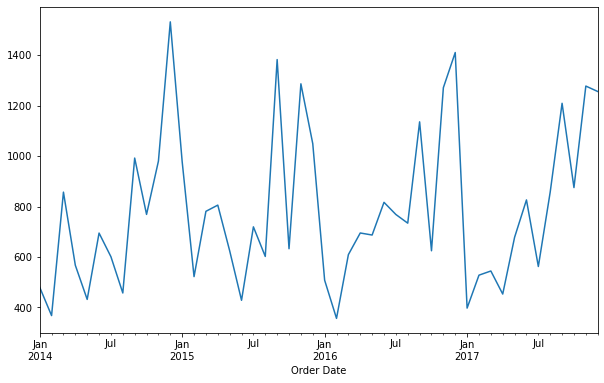

In [18]:
y.plot(figsize=(10, 6))
plt.show()       ###  there is a seasonal pattern that every end of year there is a spike

In [19]:
train=y.loc[:'2016-12-01']
train.tail()



Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [20]:

test=y.loc['2017-01-01':]
test.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

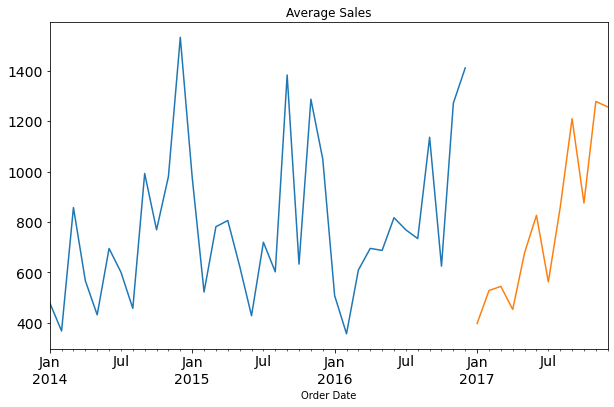

In [21]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


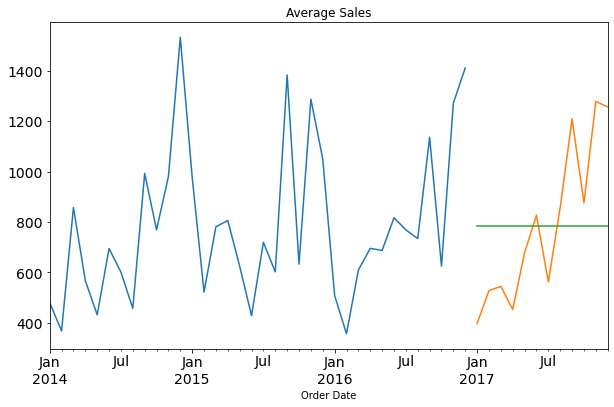

In [22]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))         ## for how many steps model have to forecast

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [23]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

415.8766421605101

In [24]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

303.4766733011766


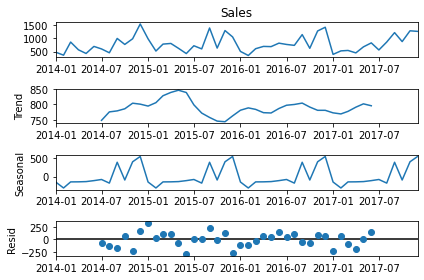

In [25]:
## decomposition graph gives us the idea about which model to choose , wether there is trend or seasonality or both
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


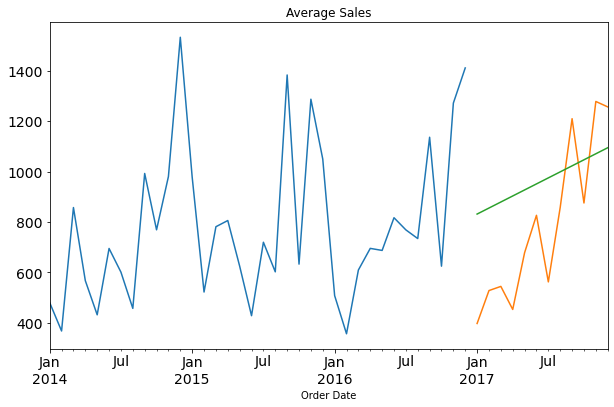

In [26]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
## smoothing level =alpha => how much weightage to be assigned to older data and newer data
#smoothing slope=beta=> ho much should be the inclination of the predicted line
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.3)
Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [27]:
fit1.aic

427.9438602932987

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

290.1430995297401


In [29]:
"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

"\nimport numpy as np\nfor i in np.arange(0,1,0.01):\n    for j in np.arange(0,1,0.01):\n        from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        print(fit1.aic,i,j)\n"

C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


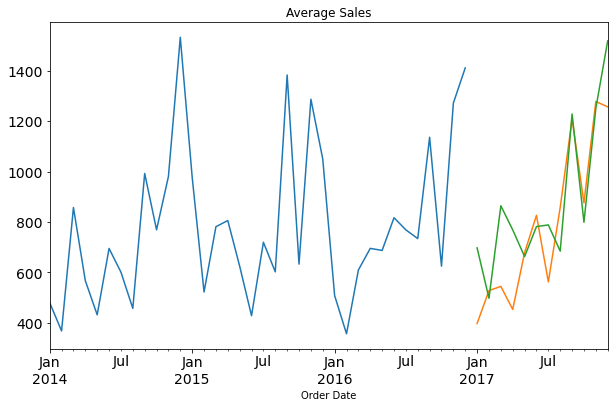

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

193.9119904555351


In [32]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [33]:
#p+q+P+Q<=10
#p+q<=3

In [34]:
import pmdarima as pm

In [35]:

model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=526.315, BIC=529.368, Time=1.174 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=505.062, BIC=511.167, Time=0.731 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=492.862, BIC=498.968, Time=0.750 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=524.319, BIC=525.845, Time=0.030 seconds
Fit ARIMA(1,2,0)x(0,1,0,12) [intercept=True]; AIC=504.068, BIC=508.647, Time=0.116 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(1,2,0)x(0,1,1,12) [intercept=True]; AIC=504.452, BIC=510.557, Time=0.964 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(1,2,0)x(1,1,1,12) [intercept=True]; AIC=505.690, BIC=513.322, Time=1.028 seconds
Near non-invertible roots for order (1, 2, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(2,2,0)x(0,1,0,12) [intercept=True]; AIC=501.443, BIC=507.548, Time=0.208 seconds
Fit ARIMA(2,2,0)x(1,1,0,12) [intercept=True]; AIC=499.239, BIC=506.871, Time=0.560 seconds
Fit ARIMA(2,2,0)x(2,1,0,12) [intercept=True]; AIC=497.283, BIC=506.442, Time=1.504 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,2,0)x(3,1,0,12) [intercept=True]; AIC=499.129, BIC=509.813, Time=3.019 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,2,0)x(2,1,1,12) [intercept=True]; AIC=498.991, BIC=509.675, Time=2.964 seconds
Near non-invertible roots for order (2, 2, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,2,0)x(1,1,1,12) [intercept=True]; AIC=497.708, BIC=506.867, Time=1.229 seconds
Near non-invertible roots for order (2, 2, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,2,0)x(3,1,1,12) [intercept=True]; AIC=501.282, BIC=513.493, Time=3.652 seconds
Near non-invertible roots for order (2, 2, 0)(3, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,2,0)x(2,1,0,12) [intercept=True]; AIC=505.587, BIC=513.218, Time=1.164 seconds
Fit ARIMA(3,2,0)x(2,1,0,12) [intercept=True]; AIC=492.100, BIC=502.784, Time=2.182 seconds
Fit ARIMA(3,2,0)x(1,1,0,12) [intercept=True]; AIC=491.413, BIC=500.571, Time=1.225 seconds
Fit ARIMA(3,2,0)x(0,1,0,12) [intercept=True]; AIC=497.246, BIC=504.877, Time=0.514 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,2,0)x(1,1,1,12) [intercept=True]; AIC=491.795, BIC=502.479, Time=1.547 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(3,2,0)x(0,1,1,12) [intercept=True]; AIC=490.234, BIC=499.392, Time=1.406 seconds
Near non-invertible roots for order (3, 2, 0)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,2,0)x(2,1,1,12) [intercept=True]; AIC=494.418, BIC=506.629, Time=4.573 seconds
Fit ARIMA(3,2,1)x(1,1,0,12) [intercept=True]; AIC=488.191, BIC=498.875, Time=1.537 seconds
Near non-invertible roots for order (3, 2, 1)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,2,1)x(1,1,0,12) [intercept=True]; AIC=486.895, BIC=496.053, Time=1.262 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,2,1)x(0,1,0,12) [intercept=True]; AIC=490.761, BIC=498.393, Time=0.550 seconds
Near non-invertible roots for order (2, 2, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,2,1)x(2,1,0,12) [intercept=True]; AIC=487.550, BIC=498.235, Time=2.798 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,2,1)x(1,1,1,12) [intercept=True]; AIC=486.906, BIC=497.590, Time=1.502 seconds
Near non-invertible roots for order (2, 2, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,2,1)x(0,1,1,12) [intercept=True]; AIC=484.923, BIC=494.081, Time=1.334 seconds
Near non-invertible roots for order (2, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,2,1)x(2,1,1,12) [intercept=True]; AIC=490.854, BIC=503.065, Time=3.291 seconds
Near non-invertible roots for order (2, 2, 1)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(1,2,1)x(1,1,0,12) [intercept=True]; AIC=487.262, BIC=494.894, Time=1.084 seconds
Near non-invertible roots for order (1, 2, 1)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,2,2)x(1,1,0,12) [intercept=True]; AIC=488.286, BIC=498.970, Time=1.489 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(1,2,2)x(1,1,0,12) [intercept=True]; AIC=483.250, BIC=492.408, Time=1.329 seconds
Near non-invertible roots for order (1, 2, 2)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(3,2,2)x(1,1,0,12) [intercept=True]; AIC=490.939, BIC=503.150, Time=1.656 seconds
Total fit time: 48.810 seconds


C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
model.aic()

483.25019648422125

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(1,2,2),seasonal_order=(1,1,0,12)).fit()


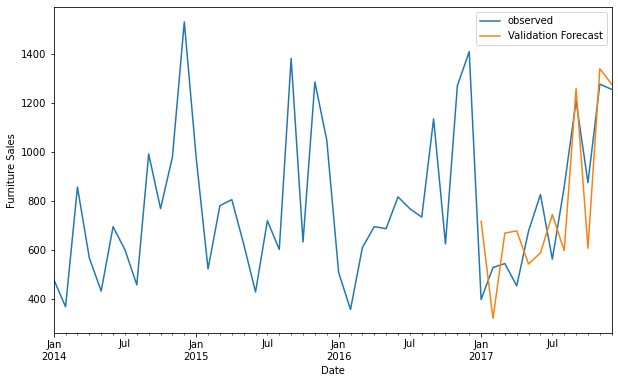

In [42]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [43]:
pred.predicted_mean

Order Date
2017-01-01     717.881157
2017-02-01     320.559544
2017-03-01     669.073681
2017-04-01     678.000818
2017-05-01     542.749127
2017-06-01     588.087082
2017-07-01     744.928448
2017-08-01     597.733656
2017-09-01    1259.076140
2017-10-01     607.314272
2017-11-01    1340.630847
2017-12-01    1277.758109
Freq: MS, dtype: float64

In [44]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


197.16944485134087


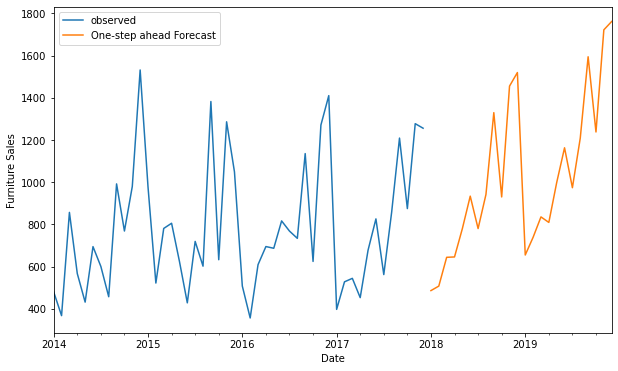

In [49]:
pred_uc = model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [48]:
Y_predictions=pred_uc.predicted_mean
Y_predictions

2018-01-01     486.640357
2018-02-01     507.952197
2018-03-01     644.372066
2018-04-01     646.100753
2018-05-01     780.630602
2018-06-01     934.287957
2018-07-01     780.634690
2018-08-01     942.264407
2018-09-01    1330.040653
2018-10-01     930.533619
2018-11-01    1455.908898
2018-12-01    1520.130852
2019-01-01     655.356723
2019-02-01     739.317750
2019-03-01     835.874494
2019-04-01     809.737931
2019-05-01     998.512118
2019-06-01    1163.487098
Freq: MS, dtype: float64

In [50]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)